# EDA process

The objective of this EDA is to prepare the data for the machine learning process. We are building a model which makes recommendations based on user id

Import the libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa

## Load the files

In [2]:
df_reviews = pd.read_csv(r'Datasets\user_reviews_clean.csv')
df_items = pd.read_csv(r'Datasets\user_items_clean.csv')
df_games = pd.read_csv(r'Datasets\steam_games_clean.csv')

## EDA for df_games

First, we look to a brief summary of the dataset

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     85578 non-null  object 
 1   release_date  85625 non-null  object 
 2   price         85625 non-null  object 
 3   early_access  85625 non-null  float64
 4   id            85625 non-null  float64
 5   developer     85625 non-null  object 
 6   genre         85625 non-null  object 
 7   app_title     85625 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.2+ MB


In [4]:
df_games['id'] = df_games['id'].astype(int)     #for some reason, pandas took the ids as a float, 
df_games['id'] = df_games['id'].astype(str)     #so let's fix that

In [5]:
df_games.describe(include='all') 

,publisher,release_date,price,early_access,id,developer,genre,app_title
count,85578,85625,85625,85625.000000,85625,85625,85625,85625
unique,8237,3583,163,NaN,32131,10993,304,32094
top,No data,No data,4.99,NaN,223750,No data,Indie,HORROR OF THE DEEP
freq,26140,10698,10971,NaN,20,14054,17137,20
mean,NaN,NaN,NaN,0.104128,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.305429,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN


Let's see the most repeated in the column genre. We are using only the top 25 since the are a lot of distinct genres

In [6]:
unique_genres = df_games['genre'].nunique()
print(unique_genres)

304


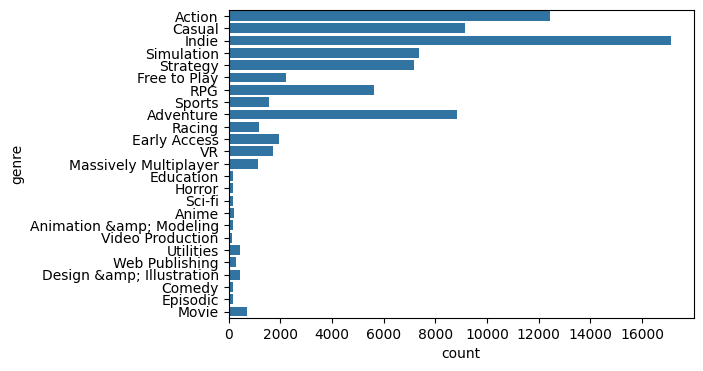

In [7]:
top_genres = df_games['genre'].value_counts().head(25).index
df_top_genres = df_games[df_games['genre'].isin(top_genres)]
plt.figure(figsize=(6, 4))
sns.countplot(data=df_top_genres, y='genre', orient='v')
plt.show()

Same with year,  publisher and developer

In [8]:
df_games['year'] = df_games['release_date'].str.extract(r'(\d{4})')
df_games.drop(columns=['release_date'], inplace=True)

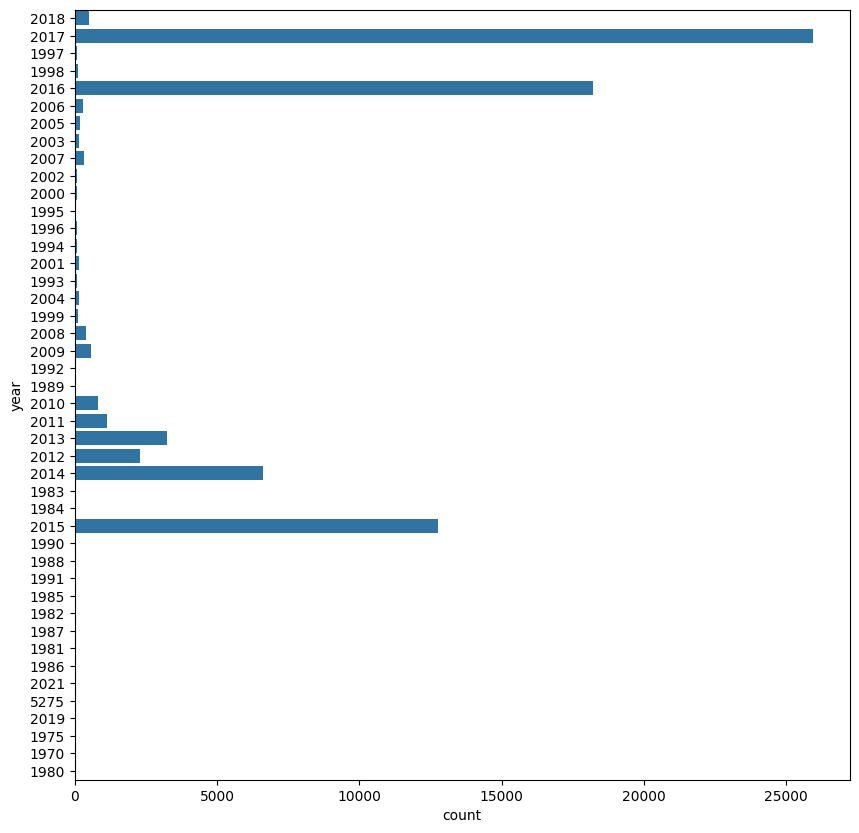

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_games, y='year', orient='h')
plt.show()

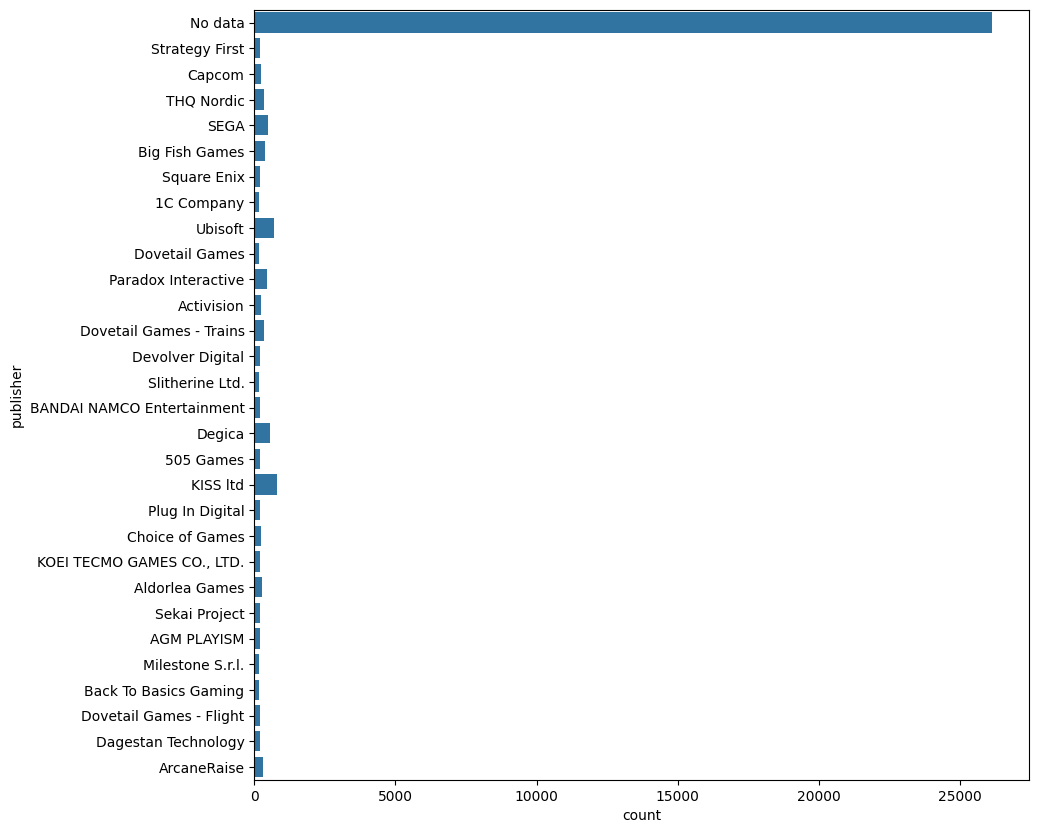

In [10]:
top_publisher = df_games['publisher'].value_counts().head(30).index
df_top_publisher = df_games[df_games['publisher'].isin(top_publisher)]
plt.figure(figsize=(10, 10))
sns.countplot(data=df_top_publisher, y='publisher', orient='h')
plt.show()

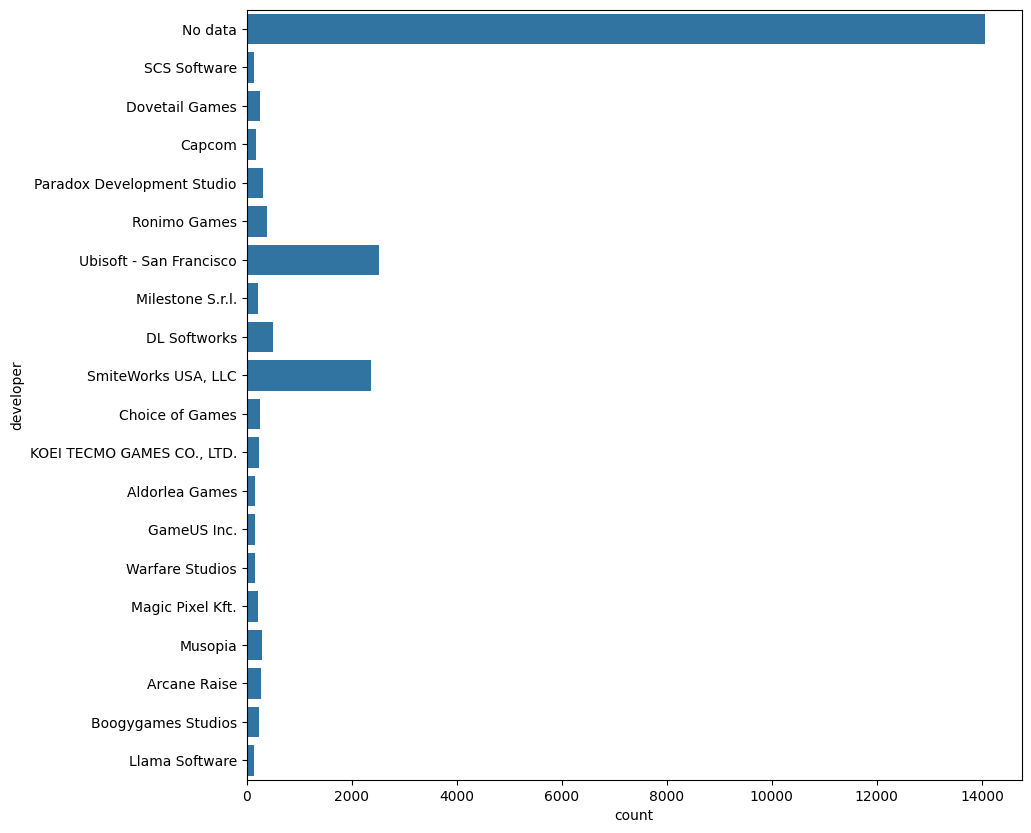

In [11]:
top_dev = df_games['developer'].value_counts().head(20).index
df_dv = df_games[df_games['developer'].isin(top_dev)]
plt.figure(figsize=(10, 10))
sns.countplot(data=df_dv, y='developer', orient='h')
plt.show()

To this model, since we dont want to waste data and publishers and developers tend, a lot of times, to be the same enterprise and, of course for the model would be important the developer and publisher, we are going to unify them in one column

In [12]:
df_games['dev/publisher'] = df_games['developer'].combine_first(df_games['publisher'])
df_games = df_games.drop(['developer', 'publisher'], axis=1)
df_games

,price,early_access,id,genre,app_title,year,dev/publisher
0,4.99,0.0,761140,Action,Lost Summoner Kitty,2018,Kotoshiro
1,4.99,0.0,761140,Casual,Lost Summoner Kitty,2018,Kotoshiro
2,4.99,0.0,761140,Indie,Lost Summoner Kitty,2018,Kotoshiro
3,4.99,0.0,761140,Simulation,Lost Summoner Kitty,2018,Kotoshiro
4,4.99,0.0,761140,Strategy,Lost Summoner Kitty,2018,Kotoshiro
...,...,...,...,...,...,...,...
85620,4.99,1.0,681550,Adventure,Maze Run VR,NaN,No data
85621,4.99,1.0,681550,Indie,Maze Run VR,NaN,No data
85622,4.99,1.0,681550,Action,Maze Run VR,NaN,No data
85623,4.99,1.0,681550,Simulation,Maze Run VR,NaN,No data


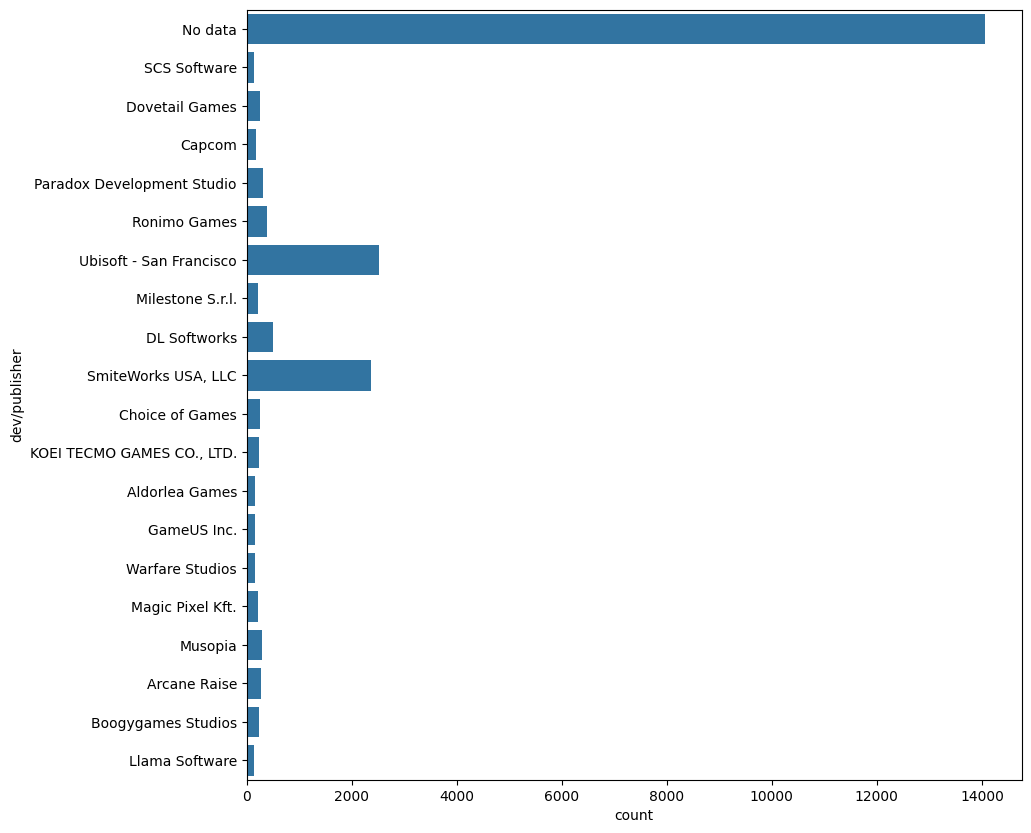

In [13]:
top_dev_pub = df_games['dev/publisher'].value_counts().head(20).index
df_dv_pb = df_games[df_games['dev/publisher'].isin(top_dev_pub)]
plt.figure(figsize=(10, 10))
sns.countplot(data=df_dv_pb, y='dev/publisher', orient='h')
plt.show()

We are dropping the "No data" value can damage the machine learning model and 14000 of 85625 is not a big thing 

In [14]:
mask = df_games["dev/publisher"] != "No data"
df_games = df_games[mask]

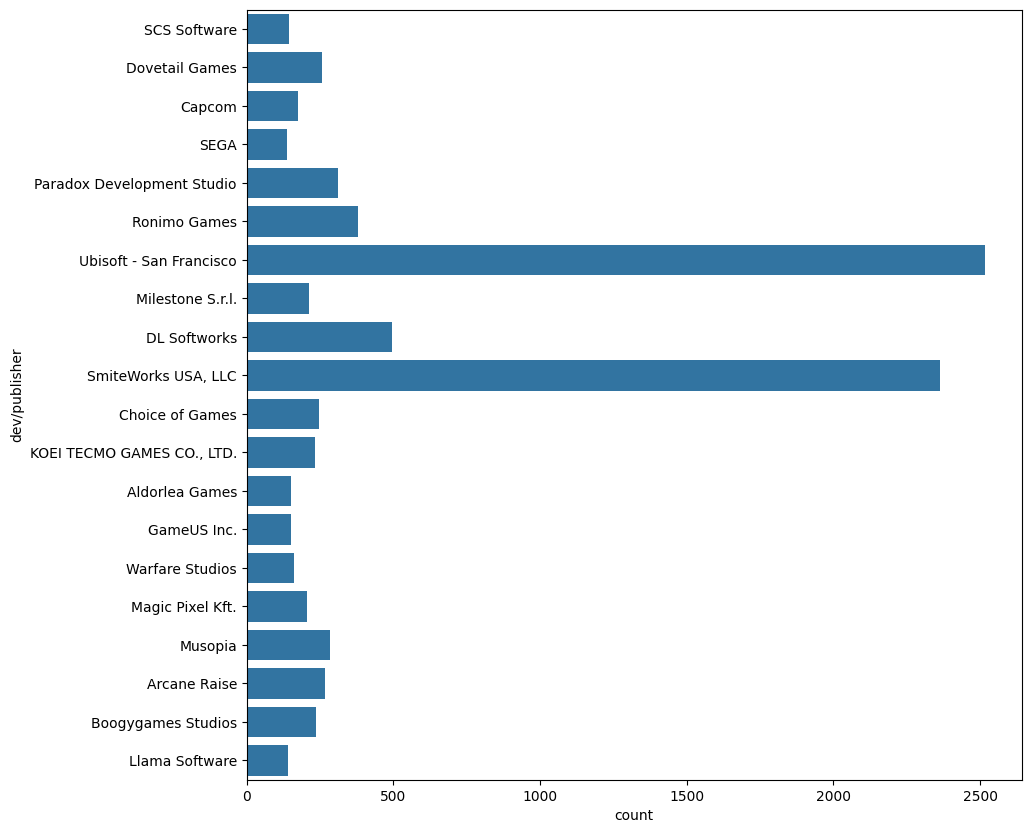

In [15]:
top_dev_pub = df_games['dev/publisher'].value_counts().head(20).index
df_dv_pb = df_games[df_games['dev/publisher'].isin(top_dev_pub)]
plt.figure(figsize=(10, 10))
sns.countplot(data=df_dv_pb, y='dev/publisher', orient='h')
plt.show()

In [16]:
filtered_df = df_games[df_games.apply(lambda row: 'No data' not in row.values, axis=1)]
df_games = filtered_df

Let's see if there are outliers in price

In [17]:
df_games ["price"] = df_games["price"].replace(["Free","Free To Play",'Free to Play',      
                                          'Play for Free!',"No data","Install Now",
                                          'Free Mod','Free HITMAN™ Holiday Pack',
                                          'Free Movie','Third-party','Free Demo',
                                          'Free to Use','Play WARMACHINE: Tactics Demo','Play Now',
                                          'Free to Try','Install Theme','Play the Demo'],0)
df_games['price'] = df_games['price'].astype(float)

In [18]:
df_games["price"].describe()

count    68279.000000
mean         8.846877
std         16.055399
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

Here you can see the general stats, 25% of cost more tha 2.99, 50% more than 4.99 and 75 % more than 9.99. Like we saw in the outlier section, the max value is 995. The mean is dismilar of the median, which means that there are outliers

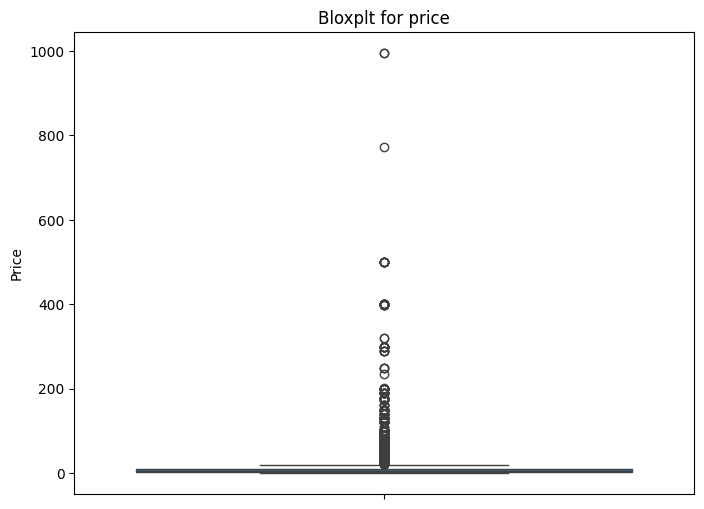

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_games, y="price")

# Mostrar el gráfico
plt.title("Bloxplt for price")
plt.ylabel("Price")
plt.show()


In [20]:
df_games

,price,early_access,id,genre,app_title,year,dev/publisher
0,4.99,0.0,761140,Action,Lost Summoner Kitty,2018,Kotoshiro
1,4.99,0.0,761140,Casual,Lost Summoner Kitty,2018,Kotoshiro
2,4.99,0.0,761140,Indie,Lost Summoner Kitty,2018,Kotoshiro
3,4.99,0.0,761140,Simulation,Lost Summoner Kitty,2018,Kotoshiro
4,4.99,0.0,761140,Strategy,Lost Summoner Kitty,2018,Kotoshiro
...,...,...,...,...,...,...,...
85614,1.99,0.0,610660,Indie,Russian Roads,2018,Laush Dmitriy Sergeevich
85615,1.99,0.0,610660,Racing,Russian Roads,2018,Laush Dmitriy Sergeevich
85616,1.99,0.0,610660,Simulation,Russian Roads,2018,Laush Dmitriy Sergeevich
85617,4.99,0.0,658870,Casual,EXIT 2 - Directions,2017,"xropi,stev3ns"


These games look like reasonable outliers, since a game can cost 1000 $ and you can see that some of their names are "Professional Edition", precisely meaning that it's an expensive edition

In [21]:
mask = df_games["price"] > 400
df_games[mask]

,price,early_access,id,genre,app_title,year,dev/publisher
4655,771.71,0.0,292180,Simulation,X-Plane 10 Global - 64 Bit,2014,Laminar Research
31974,995.00,0.0,719000,Animation &amp; Modeling,Strata Spaces VR – Professional Edition Upgrade,2017,"Strata Mixed Reality, Inc."
31975,995.00,0.0,719000,Design &amp; Illustration,Strata Spaces VR – Professional Edition Upgrade,2017,"Strata Mixed Reality, Inc."
38397,499.99,0.0,691560,Animation &amp; Modeling,CUR3D Maker Edition - Permission for commercia...,2017,RUHRSOURCE GmbH
38398,499.99,0.0,691560,Design &amp; Illustration,CUR3D Maker Edition - Permission for commercia...,2017,RUHRSOURCE GmbH
38399,499.99,0.0,691560,Education,CUR3D Maker Edition - Permission for commercia...,2017,RUHRSOURCE GmbH
38400,499.99,0.0,691560,Utilities,CUR3D Maker Edition - Permission for commercia...,2017,RUHRSOURCE GmbH
48538,499.99,0.0,629796,Free to Play,EVE Online: 15400 PLEX,2017,CCP
48539,499.99,0.0,629796,Massively Multiplayer,EVE Online: 15400 PLEX,2017,CCP
48540,499.99,0.0,629796,RPG,EVE Online: 15400 PLEX,2017,CCP


## EDA for df_reviews

In [22]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             8010 non-null   object
 1   user_url            8010 non-null   object
 2   funny               8010 non-null   object
 3   posted              8010 non-null   object
 4   last_edited         1138 non-null   object
 5   item_id             8010 non-null   int64 
 6   helpful             8010 non-null   object
 7   recommend           8010 non-null   bool  
 8   sentiment_analysis  8010 non-null   int64 
dtypes: bool(1), int64(2), object(6)
memory usage: 508.6+ KB


In [23]:
df_reviews.describe(include='all') 

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,sentiment_analysis
count,8010,8010,8010,8010,1138,8010.000000,8010,8010,8010.000000
unique,5620,5620,185,1168,621,NaN,1134,2,NaN
top,NKraz,http://steamcommunity.com/id/NKraz,1 person found this review funny,"Posted June 20, 2015.","Last edited February 9, 2015.",NaN,1 of 1 people (100%) found this review helpful,True,NaN
freq,9,9,5083,27,6,NaN,1053,6527,NaN
mean,NaN,NaN,NaN,NaN,NaN,204645.265418,NaN,NaN,1.179026
std,NaN,NaN,NaN,NaN,NaN,141695.938758,NaN,NaN,0.709291
min,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,34330.000000,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,233130.000000,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,311730.000000,NaN,NaN,2.000000


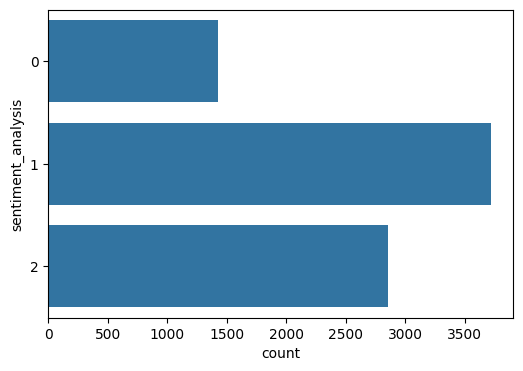

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_reviews, y='sentiment_analysis', orient='v')
plt.show()

In [25]:
percentage = df_reviews['sentiment_analysis'].value_counts(normalize=True) * 100

# Mostrar los porcentajes
print(percentage)

sentiment_analysis
1    46.491885
2    35.705368
0    17.802747
Name: proportion, dtype: float64


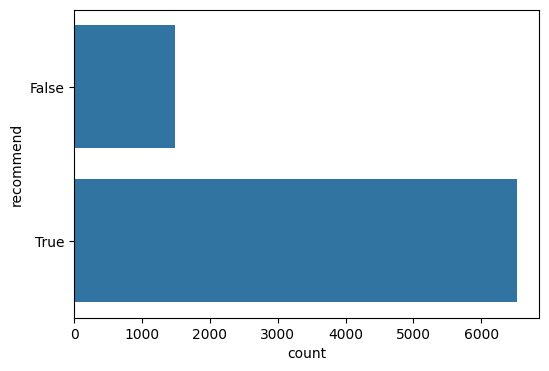

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_reviews, y='recommend', orient='v')
plt.show()

In [27]:
percentage = df_reviews['recommend'].value_counts(normalize=True) * 100

# Mostrar los porcentajes
print(percentage)

recommend
True     81.485643
False    18.514357
Name: proportion, dtype: float64


The percentage of the sum of 2 and 1 values of sentiment analysis is like 81%, which is the number of True en recommend. Another weird thing is to notice that a lot of recommendations have a neutral review, and some (outliers) have a bad sentiment analysis (0 value) but recommend the game 

In [28]:
mask = (df_reviews['recommend'] == True) & (df_reviews['sentiment_analysis'] == 0)
df_reviews[mask]

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,sentiment_analysis
5,76561198089393905,http://steamcommunity.com/profiles/76561198089...,5 people found this review funny,"Posted February 1, 2015.",NaN,72850,3 of 3 people (100%) found this review helpful,True,0
13,UTNerd24,http://steamcommunity.com/id/UTNerd24,2 people found this review funny,"Posted December 2, 2015.",NaN,440,1 of 2 people (50%) found this review helpful,True,0
18,sad-commie,http://steamcommunity.com/id/sad-commie,2 people found this review funny,Posted August 31.,NaN,294100,2 of 2 people (100%) found this review helpful,True,0
28,Nozomikat,http://steamcommunity.com/id/Nozomikat,1 person found this review funny,"Posted December 4, 2013.",NaN,210770,No ratings yet,True,0
35,kevinator23,http://steamcommunity.com/id/kevinator23,2 people found this review funny,"Posted July 6, 2015.",NaN,320760,4 of 6 people (67%) found this review helpful,True,0
...,...,...,...,...,...,...,...,...,...
7986,76561198208704549,http://steamcommunity.com/profiles/76561198208...,1 person found this review funny,"Posted August 31, 2015.","Last edited September 8, 2015.",730,1 of 2 people (50%) found this review helpful,True,0
7988,bestcustomurlevermade,http://steamcommunity.com/id/bestcustomurlever...,1 person found this review funny,Posted March 14.,NaN,4000,No ratings yet,True,0
7992,Hahneex,http://steamcommunity.com/id/Hahneex,1 person found this review funny,"Posted December 4, 2015.",NaN,730,1 of 1 people (100%) found this review helpful,True,0
7993,76561198222628548,http://steamcommunity.com/profiles/76561198222...,9 people found this review funny,"Posted April 10, 2015.",NaN,359800,29 of 52 people (56%) found this review helpful,True,0


In [29]:
percentage_of_0_recommend = (884/8010)*100
print(percentage_of_0_recommend)

11.036204744069913


884 people seems to recommend a game but have a negative sentiment analysis, and 11% of the dataframe. Pretty weird

## EDA for df_items

In [30]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           int64  
 1   item_name         object 
 2   playtime_forever  float64
 3   playtime_2weeks   float64
 4   user_id           object 
 5   items_count       int64  
 6   steam_id          int64  
 7   user_url          object 
dtypes: float64(2), int64(3), object(3)
memory usage: 310.9+ MB


In [31]:
df_items['item_id'] = df_items['item_id'].astype(int)     #like before, for some reason, pandas took the ids as a float, 
df_items['item_id'] = df_items['item_id'].astype(str)     #so let's fix that

In [32]:
df_items.describe(include='all')

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,items_count,steam_id,user_url
count,5094105,5094105,5.094105e+06,5.094105e+06,5094105,5.094105e+06,5.094105e+06,5094105
unique,10978,10947,NaN,NaN,70912,NaN,NaN,70912
top,205790,Dota 2 Test,NaN,NaN,phrostb,NaN,NaN,http://steamcommunity.com/id/phrostb
freq,49136,49136,NaN,NaN,7762,NaN,NaN,7762
mean,NaN,NaN,9.905511e+02,9.069004e+00,NaN,3.157324e+02,7.656120e+16,NaN
std,NaN,NaN,5.414297e+03,1.403145e+02,NaN,6.969073e+02,3.917652e+07,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN,1.000000e+00,7.656120e+16,NaN
25%,NaN,NaN,0.000000e+00,0.000000e+00,NaN,7.100000e+01,7.656120e+16,NaN
50%,NaN,NaN,3.400000e+01,0.000000e+00,NaN,1.370000e+02,7.656120e+16,NaN
75%,NaN,NaN,3.550000e+02,0.000000e+00,NaN,2.750000e+02,7.656120e+16,NaN


Let's search for outliers and correlations

<Axes: ylabel='items_count'>

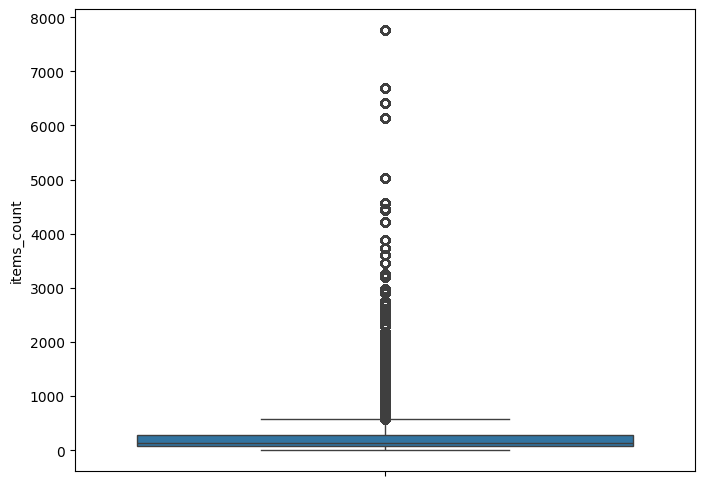

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_items, y="items_count")

4 players played more than 5500 distinct games

In [34]:
gamers_playtime = df_items.groupby('user_id')['items_count'].unique().explode()
gamers_playtime = pd.DataFrame(gamers_playtime)
gamers_playtime = gamers_playtime.sort_values('items_count', ascending=False).reset_index()
gamers_playtime

,user_id,items_count
0,phrostb,7762
1,thugnificent,6700
2,chidvd,6410
3,piepai,6132
4,mayshowganmore,5027
...,...,...
70907,76561198092978311,1
70908,76561198092984441,1
70909,76561198092985047,1
70910,76561198092995747,1


Here we can see who they are. Phrostb is the player with most games played. In general most of them tend to be below 1000 distinct games played

Let's see the players who played more time in general

In [35]:
grouped = df_items.groupby('user_id')['playtime_forever'].sum()
user_playtime = pd.DataFrame(grouped)
user_playtime = user_playtime.sort_values('playtime_forever', ascending=False).reset_index()
user_playtime = user_playtime.explode("user_id")
user_playtime

,user_id,playtime_forever
0,REBAS_AS_F-T,4660393.0
1,shinomegami,3303502.0
2,Sp3ctre,2822860.0
3,DownSyndromeKid,2790419.0
4,Terminally-Chill,1734007.0
...,...,...
70907,76561198093092186,0.0
70908,76561198093101220,0.0
70909,76561198071031431,0.0
70910,76561198093101350,0.0


REBAS_AS_F-T is the user who played the most

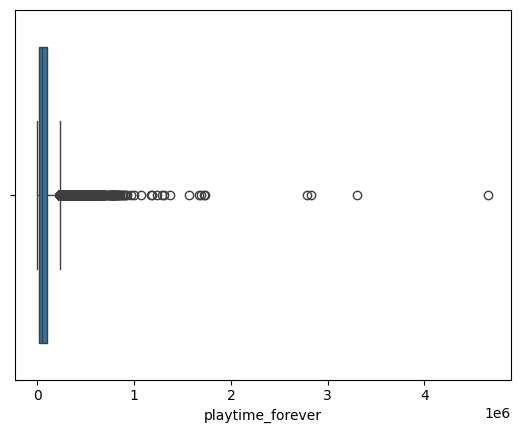

In [36]:
sns.boxplot(x='playtime_forever', data=user_playtime)
plt.show()

In [37]:
user_playtime.describe()    #general stats of the playtime

,playtime_forever
count,7.091200e+04
mean,7.115821e+04
std,8.847746e+04
min,0.000000e+00
25%,1.149300e+04
50%,4.417300e+04
75%,1.010822e+05
max,4.660393e+06


We want to see, now, what about the games

In [38]:
df_items.head(1)

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,items_count,steam_id,user_url
0,10,Counter-Strike,6.0,0.0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


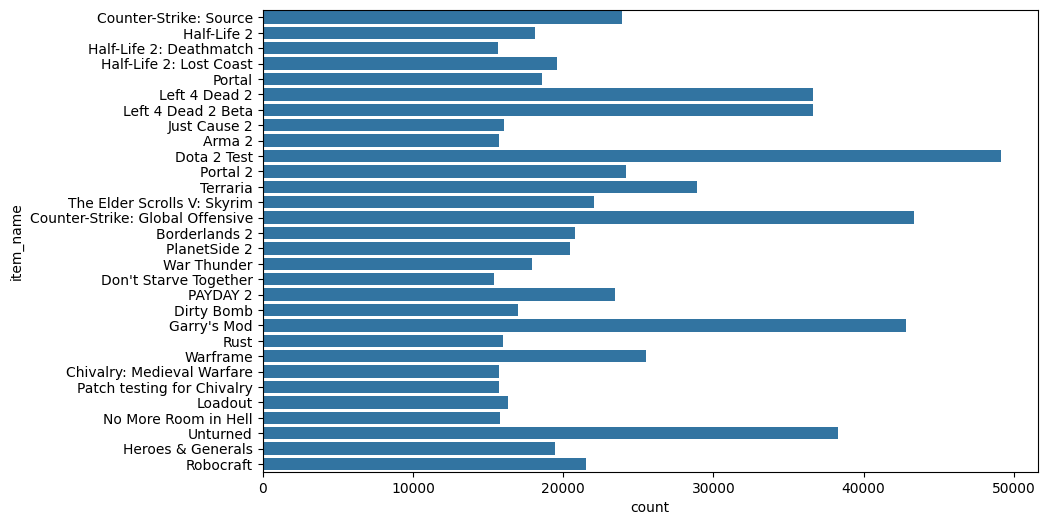

In [39]:
top_games = df_items['item_name'].value_counts().head(30).index
df_item_name = df_items[df_items['item_name'].isin(top_games)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_item_name, y='item_name', orient='v')
plt.show()

Dota 2 is the game who has more distinct players  (which makes sense, since it's a Free to Play and it's a Valve game)

Now we want to see which is the most played according to hours played



In [45]:
game_playtime = df_items.groupby('item_name')['playtime_forever'].sum().reset_index()

game_playtime = game_playtime.sort_values(by='playtime_forever', ascending=False).reset_index(drop=True)


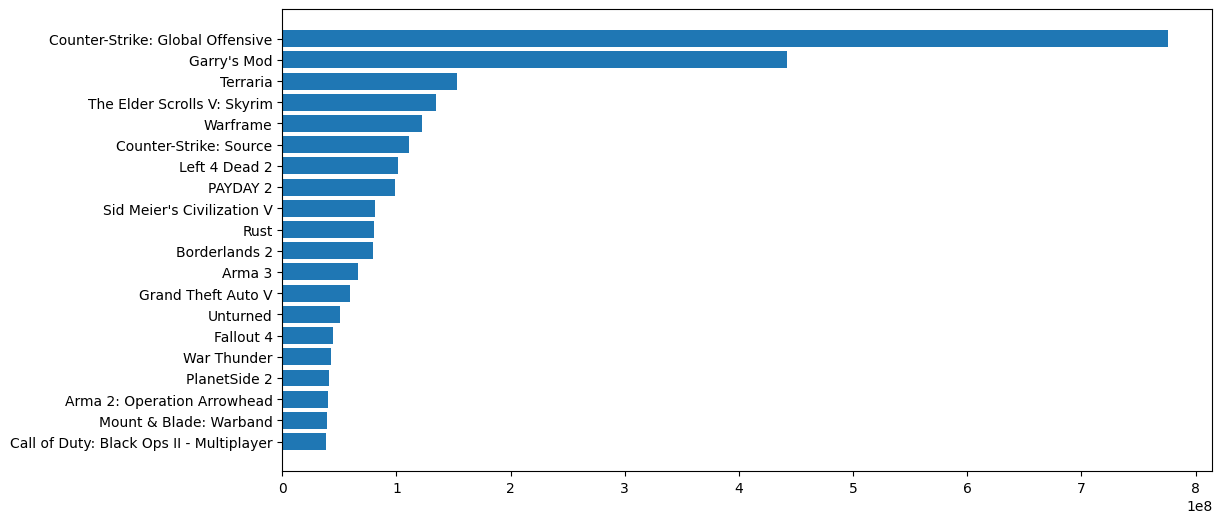

In [44]:
top_20 = game_playtime.sort_values(by='playtime_forever', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_20['item_name'], top_20['playtime_forever'])
plt.gca().invert_yaxis()  # Invert the y axis to show the most played game up
plt.show()

CSGO is the most played games, makes sense since is the most famous Valve game and STEAM it's plataform

In [57]:
df_reviews.head(1)

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,sentiment_analysis
0,maplemage,http://steamcommunity.com/id/maplemage,3 people found this review funny,"Posted April 15, 2014.",NaN,211420,35 of 43 people (81%) found this review helpful,True,1
1,maplemage,http://steamcommunity.com/id/maplemage,1 person found this review funny,"Posted December 23, 2013.",NaN,211820,12 of 16 people (75%) found this review helpful,True,1
2,maplemage,http://steamcommunity.com/id/maplemage,2 people found this review funny,"Posted March 14, 2014.",NaN,730,5 of 5 people (100%) found this review helpful,True,2
3,Wackky,http://steamcommunity.com/id/Wackky,1 person found this review funny,"Posted October 21, 2012.","Last edited November 25, 2013.",550,1 of 1 people (100%) found this review helpful,True,1
4,76561198079601835,http://steamcommunity.com/profiles/76561198079...,1 person found this review funny,Posted May 20.,NaN,730,0 of 1 people (0%) found this review helpful,True,1
...,...,...,...,...,...,...,...,...,...
8005,MeloncraftLP,http://steamcommunity.com/id/MeloncraftLP,2 people found this review funny,Posted July 27.,NaN,265630,1 of 15 people (7%) found this review helpful,False,0
8006,76561198277602337,http://steamcommunity.com/profiles/76561198277...,3 people found this review funny,Posted August 2.,NaN,306130,4 of 19 people (21%) found this review helpful,False,0
8007,sexyawp,http://steamcommunity.com/id/sexyawp,1 person found this review funny,Posted April 25.,NaN,427730,1 of 2 people (50%) found this review helpful,True,1
8008,76561198310819422,http://steamcommunity.com/profiles/76561198310...,1 person found this review funny,Posted June 23.,NaN,570,1 of 1 people (100%) found this review helpful,True,1


In [49]:
df_games.head(1)

,price,early_access,id,genre,app_title,year,dev/publisher
0,4.99,0.0,761140,Action,Lost Summoner Kitty,2018,Kotoshiro


In [59]:
df_items.head(1)

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,items_count,steam_id,user_url
0,10,Counter-Strike,6.0,0.0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Let's create the definitive dataset

In [76]:
df_ml1 = df_items[["item_id","item_name","playtime_forever","user_id"]]
df_ml2 = df_games[["id","genre","year","dev/publisher"]]
df_ml3 = df_reviews[["user_id","recommend","sentiment_analysis"]]

In [77]:
df_ml = df_ml1.merge(df_ml2, left_on="item_id", right_on="id", how='left')
df_ml.drop("id", axis = 1, inplace = True)
df_ml = df_ml.merge(df_ml3, on ="user_id", how = "left")
df_ml = df_ml.dropna()
df_ml = df_ml.drop_duplicates()

In [81]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000582 entries, 6021 to 11749140
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   item_id             object 
 1   item_name           object 
 2   playtime_forever    float64
 3   user_id             object 
 4   genre               object 
 5   year                object 
 6   dev/publisher       object 
 7   recommend           object 
 8   sentiment_analysis  float64
dtypes: float64(2), object(7)
memory usage: 152.6+ MB


We save it in a parquet, since it's a heavy file

In [93]:
nombre_archivo_parquet = 'Api_DataFrame/df_ml.parquet'

# Guarda el DataFrame en un archivo Parquet
df_ml.to_parquet(nombre_archivo_parquet, engine='pyarrow')